## Choosing the best path for creating Quantum channels

Using VQE to get the optimal path to set up quantum channels between different people based on distances between them.The nodes represent the positions of different people who want to communicate through quantum channels 

In [1]:
# useful additional packages
import matplotlib.pyplot as plt
import matplotlib.axes as axes
%matplotlib inline
import numpy as np
import networkx as nx

from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
from qiskit_optimization.applications import Maxcut, Tsp
from qiskit.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA,COBYLA
from qiskit.utils import algorithm_globals
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram

In [2]:
from quantuminspire.qiskit import QI
from getpass import getpass


distance
 [[0. 3. 5.]
 [3. 0. 4.]
 [5. 4. 0.]]


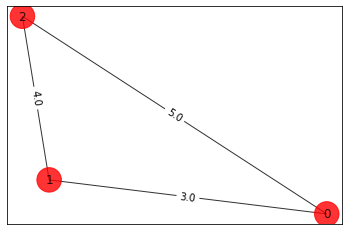

In [3]:
#node = 3
n = 3
#minumum and maximum distances
low=0  
high=6
num_qubits = n ** 2
tsp = Tsp.create_random_instance(n,low,high, seed=123)
adj_matrix = nx.to_numpy_matrix(tsp.graph)
print('distance\n', adj_matrix)

colors = ['r' for node in tsp.graph.nodes]
pos = [tsp.graph.nodes[node]['pos']  for node in tsp.graph.nodes]
def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
draw_graph(tsp.graph, colors, pos)

In [4]:
#creating the quadratic program
qp = tsp.to_quadratic_program()
print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP

Minimize
 obj: [ 6 x_0_0*x_1_1 + 6 x_0_0*x_1_2 + 10 x_0_0*x_2_1 + 10 x_0_0*x_2_2
      + 6 x_0_1*x_1_0 + 6 x_0_1*x_1_2 + 10 x_0_1*x_2_0 + 10 x_0_1*x_2_2
      + 6 x_0_2*x_1_0 + 6 x_0_2*x_1_1 + 10 x_0_2*x_2_0 + 10 x_0_2*x_2_1
      + 8 x_1_0*x_2_1 + 8 x_1_0*x_2_2 + 8 x_1_1*x_2_0 + 8 x_1_1*x_2_2
      + 8 x_1_2*x_2_0 + 8 x_1_2*x_2_1 ]/2
Subject To
 c0: x_0_0 + x_0_1 + x_0_2 = 1
 c1: x_1_0 + x_1_1 + x_1_2 = 1
 c2: x_2_0 + x_2_1 + x_2_2 = 1
 c3: x_0_0 + x_1_0 + x_2_0 = 1
 c4: x_0_1 + x_1_1 + x_2_1 = 1
 c5: x_0_2 + x_1_2 + x_2_2 = 1

Bounds
 0 <= x_0_0 <= 1
 0 <= x_0_1 <= 1
 0 <= x_0_2 <= 1
 0 <= x_1_0 <= 1
 0 <= x_1_1 <= 1
 0 <= x_1_2 <= 1
 0 <= x_2_0 <= 1
 0 <= x_2_1 <= 1
 0 <= x_2_2 <= 1

Binaries
 x_0_0 x_0_1 x_0_2 x_1_0 x_1_1 x_1_2 x_2_0 x_2_1 x_2_2
End



In [5]:
#converting quadratric to Quadratic Unconstrained Binary Optimization problem
from qiskit_optimization.converters import QuadraticProgramToQubo

qp2qubo = QuadraticProgramToQubo()
qubo = qp2qubo.convert(qp)
#making a hamiltonion
qubitOp, offset = qubo.to_ising()
print('Offset:', offset)
print('Ising Hamiltonian:')
print(str(qubitOp))

Offset: 456.0
Ising Hamiltonian:
-77.5 * ZIIIIIIII
- 77.5 * IZIIIIIII
+ 36.5 * ZZIIIIIII
- 77.5 * IIZIIIIII
+ 36.5 * ZIZIIIIII
+ 36.5 * IZZIIIIII
- 76.5 * IIIZIIIII
+ 36.5 * ZIIZIIIII
+ 1.0 * IZIZIIIII
+ 1.0 * IIZZIIIII
- 76.5 * IIIIZIIII
+ 1.0 * ZIIIZIIII
+ 36.5 * IZIIZIIII
+ 1.0 * IIZIZIIII
+ 36.5 * IIIZZIIII
- 76.5 * IIIIIZIII
+ 1.0 * ZIIIIZIII
+ 1.0 * IZIIIZIII
+ 36.5 * IIZIIZIII
+ 36.5 * IIIZIZIII
+ 36.5 * IIIIZZIII
- 77.0 * IIIIIIZII
+ 36.5 * ZIIIIIZII
+ 1.25 * IZIIIIZII
+ 1.25 * IIZIIIZII
+ 36.5 * IIIZIIZII
+ 0.75 * IIIIZIZII
+ 0.75 * IIIIIZZII
- 77.0 * IIIIIIIZI
+ 1.25 * ZIIIIIIZI
+ 36.5 * IZIIIIIZI
+ 1.25 * IIZIIIIZI
+ 0.75 * IIIZIIIZI
+ 36.5 * IIIIZIIZI
+ 0.75 * IIIIIZIZI
+ 36.5 * IIIIIIZZI
- 77.0 * IIIIIIIIZ
+ 1.25 * ZIIIIIIIZ
+ 1.25 * IZIIIIIIZ
+ 36.5 * IIZIIIIIZ
+ 0.75 * IIIZIIIIZ
+ 0.75 * IIIIZIIIZ
+ 36.5 * IIIIIZIIZ
+ 36.5 * IIIIIIZIZ
+ 36.5 * IIIIIIIZZ


In [9]:
def get_authentication():
    """Gets the authentication for connecting to the
       Quantum Inspire API.
    """
    print("Enter email:")
    email = input()
    print("Enter password")
    password = getpass()
    return email, password 


In [10]:
if __name__ == '__main__':
    if 'authentication' not in vars().keys():
        authentication = get_authentication()
    QI.set_authentication_details(*authentication)
    backend = QI.get_backend('QX single-node simulator')

Enter email:
freya.s1@ahduni.edu.in
Enter password
········


In [6]:
algorithm_globals.random_seed = 123
seed = 10598
quantum_instance = QuantumInstance(backend, seed_simulator=seed, seed_transpiler=seed)

In [7]:
def draw_tsp_solution(G, order, colors, pos):
    G2 = nx.DiGraph()
    G2.add_nodes_from(G)
    n = len(order)
    for i in range(n):
        j = (i + 1) % n
        G2.add_edge(order[i], order[j], weight=G[order[i]][order[j]]["weight"])
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(
        G2, node_color=colors, edge_color="b", node_size=600, alpha=0.8, ax=default_axes, pos=pos
    )
    edge_labels = nx.get_edge_attributes(G2, "weight")
    nx.draw_networkx_edge_labels(G2, pos, font_color="b", edge_labels=edge_labels)



energy: -429.89355468749994
time: 25.717959880828857
feasible: True
solution: [1, 2, 0]
solution objective: 12.0


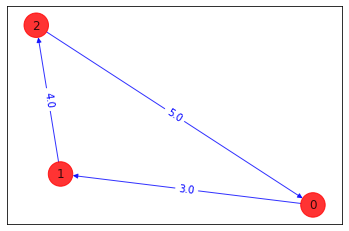

In [8]:
spsa = SPSA(maxiter=300)
#setting the ansatz
ry = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')
vqe = VQE(ry, optimizer=spsa, quantum_instance=quantum_instance)

result = vqe.compute_minimum_eigenvalue(qubitOp)

print("energy:", result.eigenvalue.real)
print("time:", result.optimizer_time)
x = tsp.sample_most_likely(result.eigenstate)
print("feasible:", qubo.is_feasible(x))
z = tsp.interpret(x)
print("solution:", z)
print("solution objective:", tsp.tsp_value(z, adj_matrix))
draw_tsp_solution(tsp.graph, z, colors, pos)